In [20]:
import pandas as pd
from pathlib import Path

data_path = Path().cwd().parent / "data"

# --------------------------------- #
#            Clustering             #
# --------------------------------- #
demand_history_df = pd.read_csv(data_path / "Demand_History.csv")
demand_history_df.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563


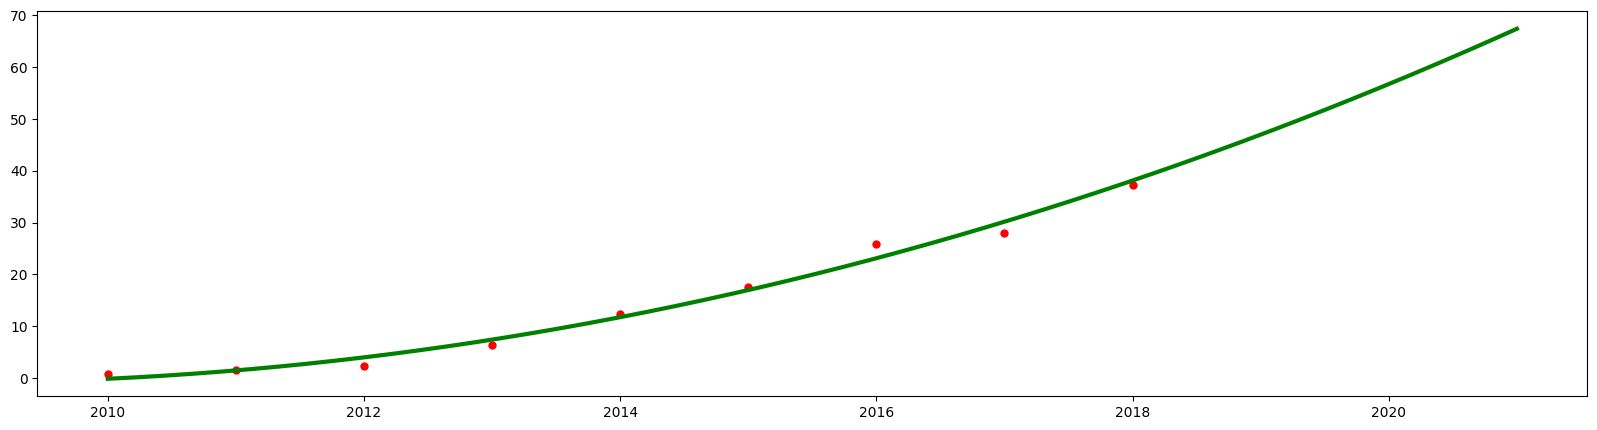

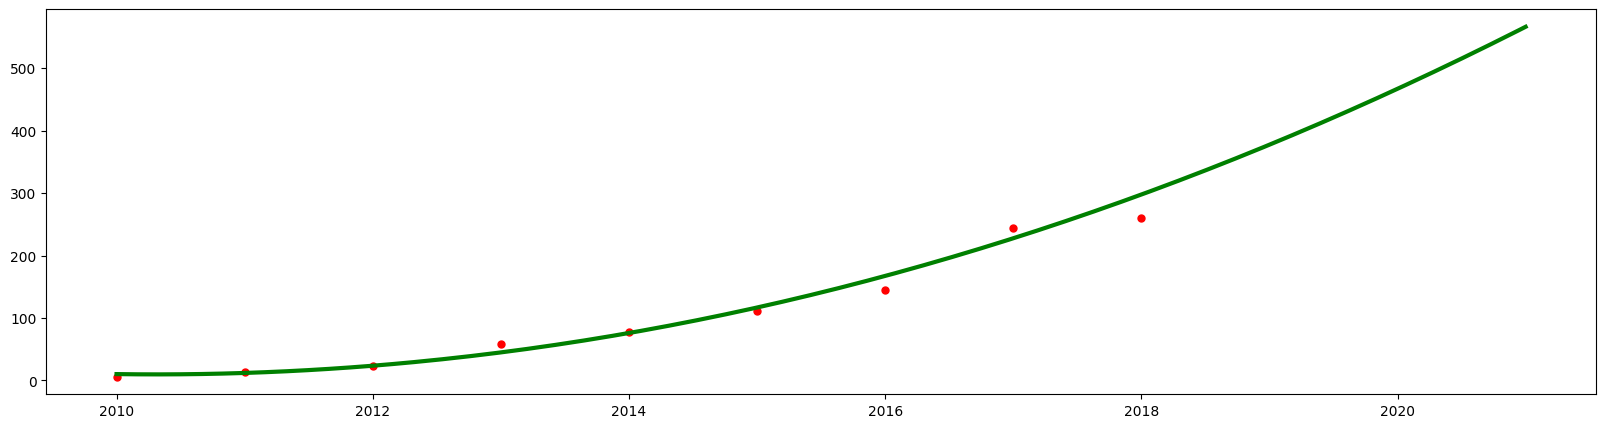

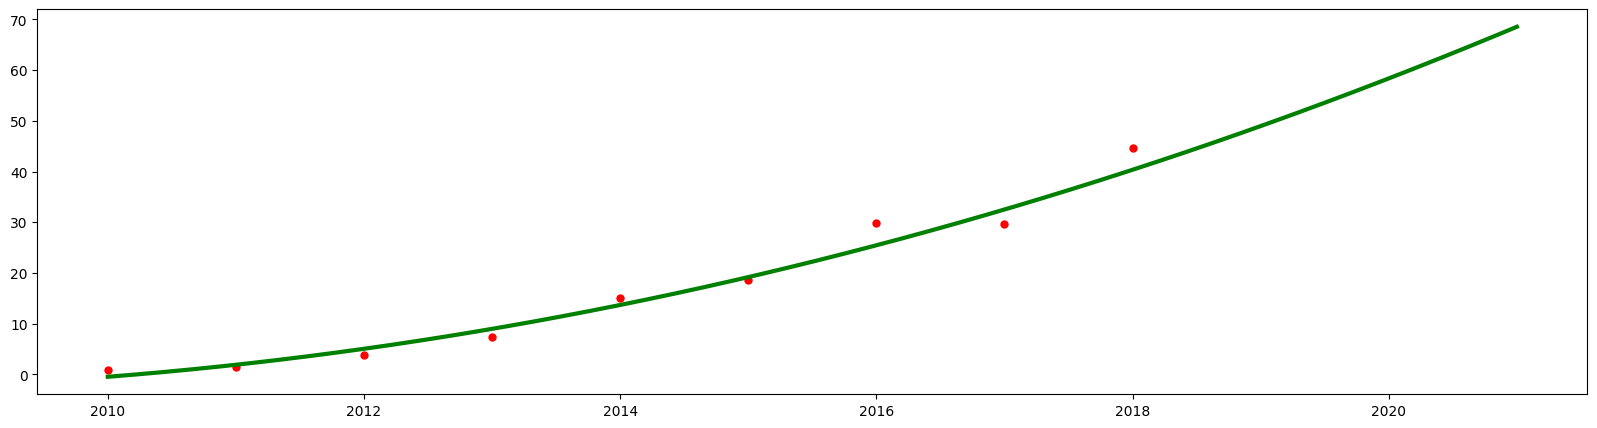

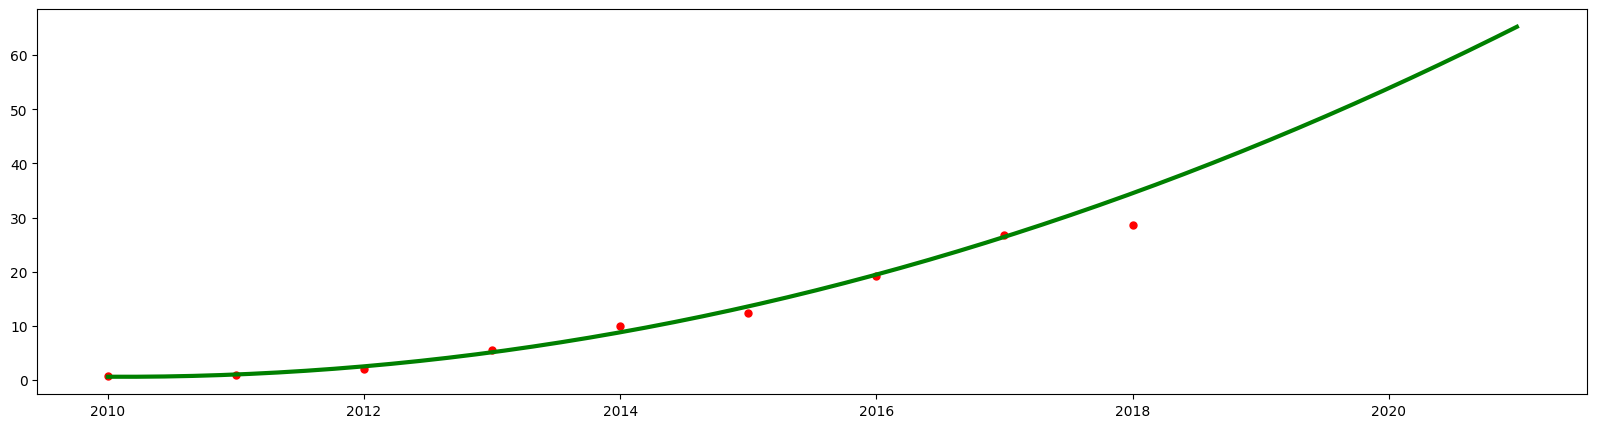

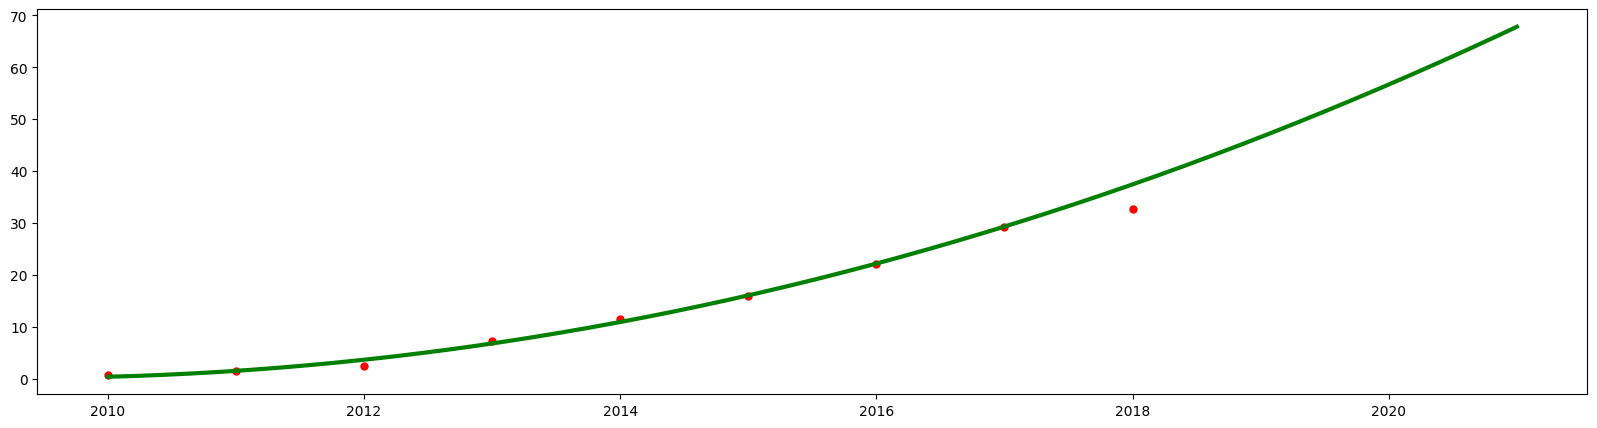

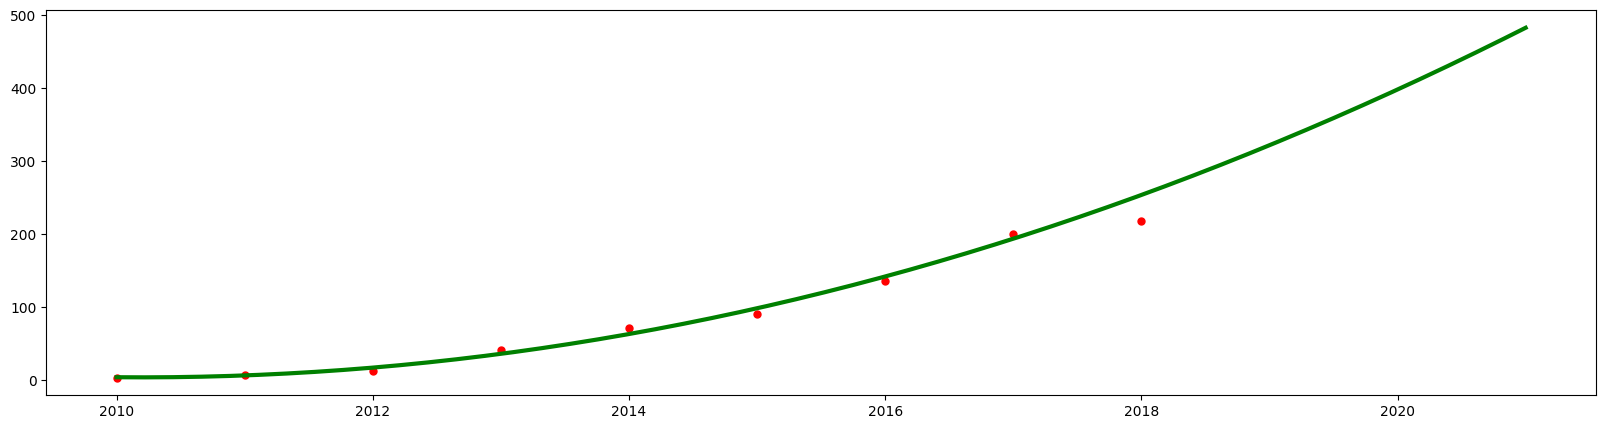

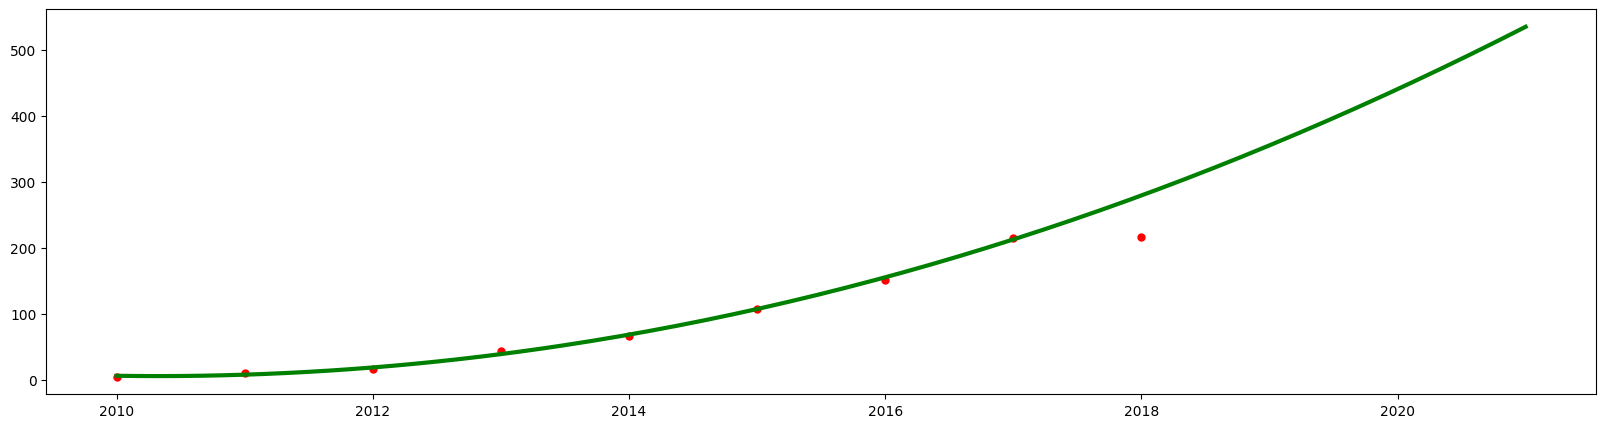

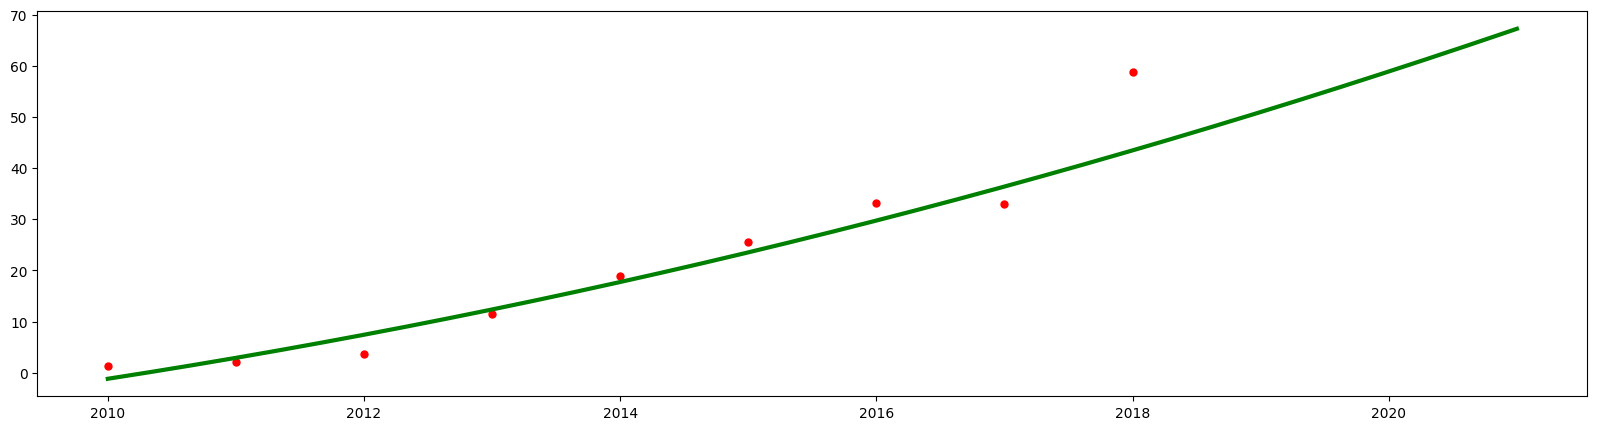

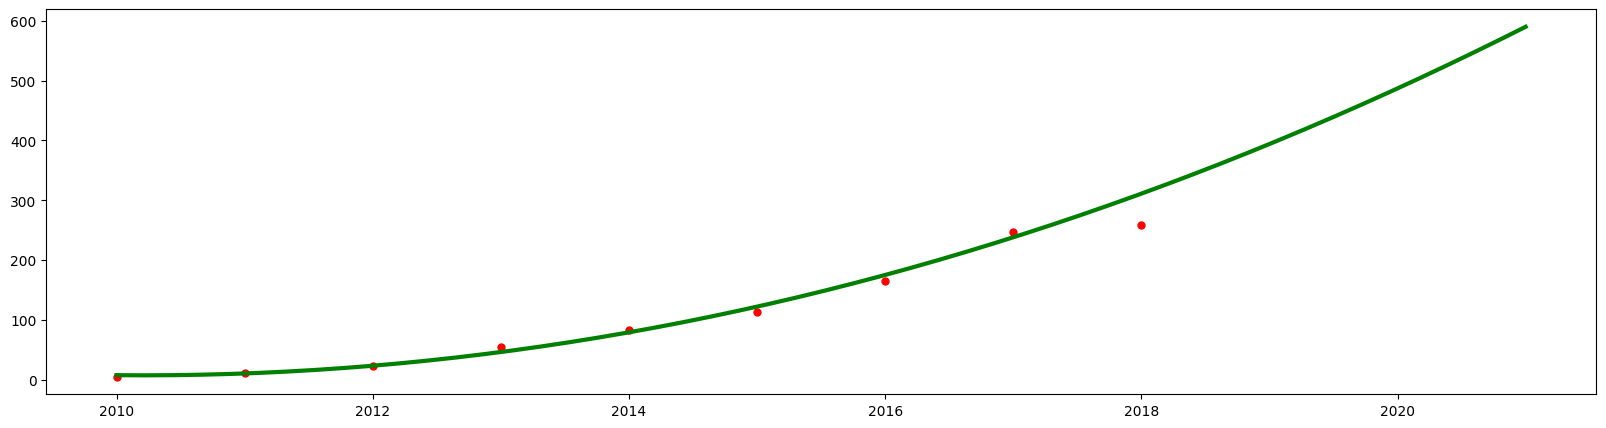

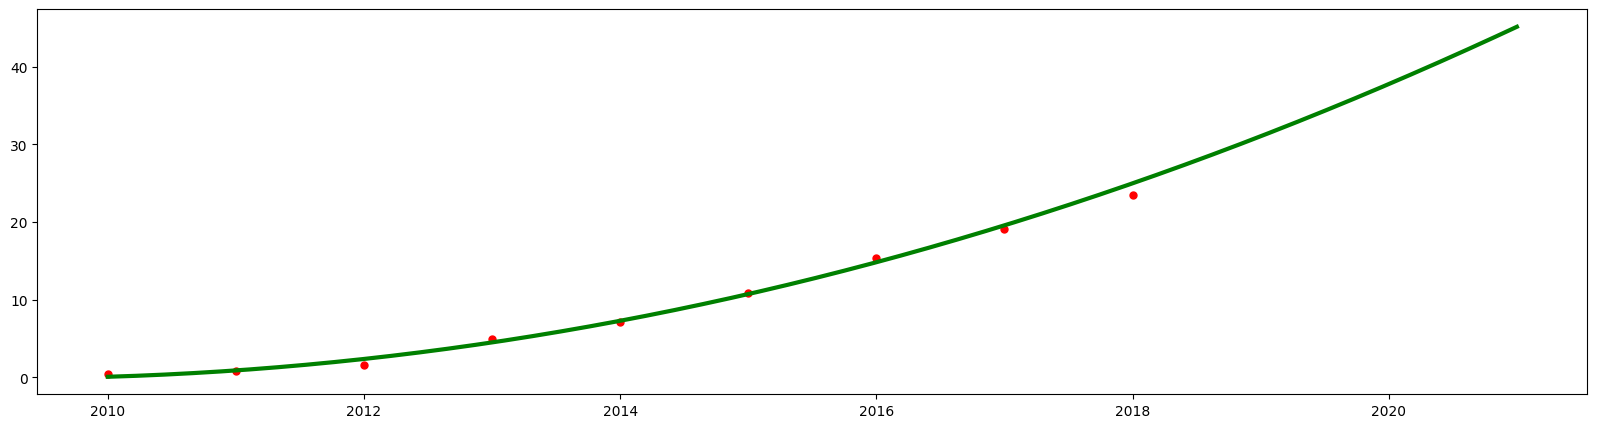

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
demand_point = np.random.randint(0, len(demand_history_df))
x = np.array(range(2010, 2019))
# y = np.log1p(demand_history_df[[str(year) for year in x]].iloc[demand_point, :].values)
for demand_point in np.random.randint(0, len(demand_history_df), 10):
    plt.figure(figsize=(20, 5))
    y = demand_history_df[[str(year) for year in x]].iloc[demand_point, :].values
    plt.plot(x, y, 'ro', ms=5)

    spl = UnivariateSpline(x[:-1], y[:-1], k=2, s=3)
    #spl.set_smoothing_factor(3000)
    xs = np.linspace(2010, 2021, 200)
    plt.plot(xs, spl(xs), 'g', lw=3)

In [48]:
import numpy as np
import pylab
from scipy.optimize import curve_fit

def exponential(x, a, b):
    return a*np.exp(b*x)

demand_point = np.random.randint(0, len(demand_history_df))
xdata = np.array(range(2010, 2019))
ydata = demand_history_df[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']].iloc[demand_point, :].values

popt, pcov = curve_fit(f=exponential, xdata=xdata, ydata=ydata, p0=[0, 0], bounds=(-np.inf, np.inf))
print(popt)

x = np.linspace(-1, 15, 50)
y = exponential(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.